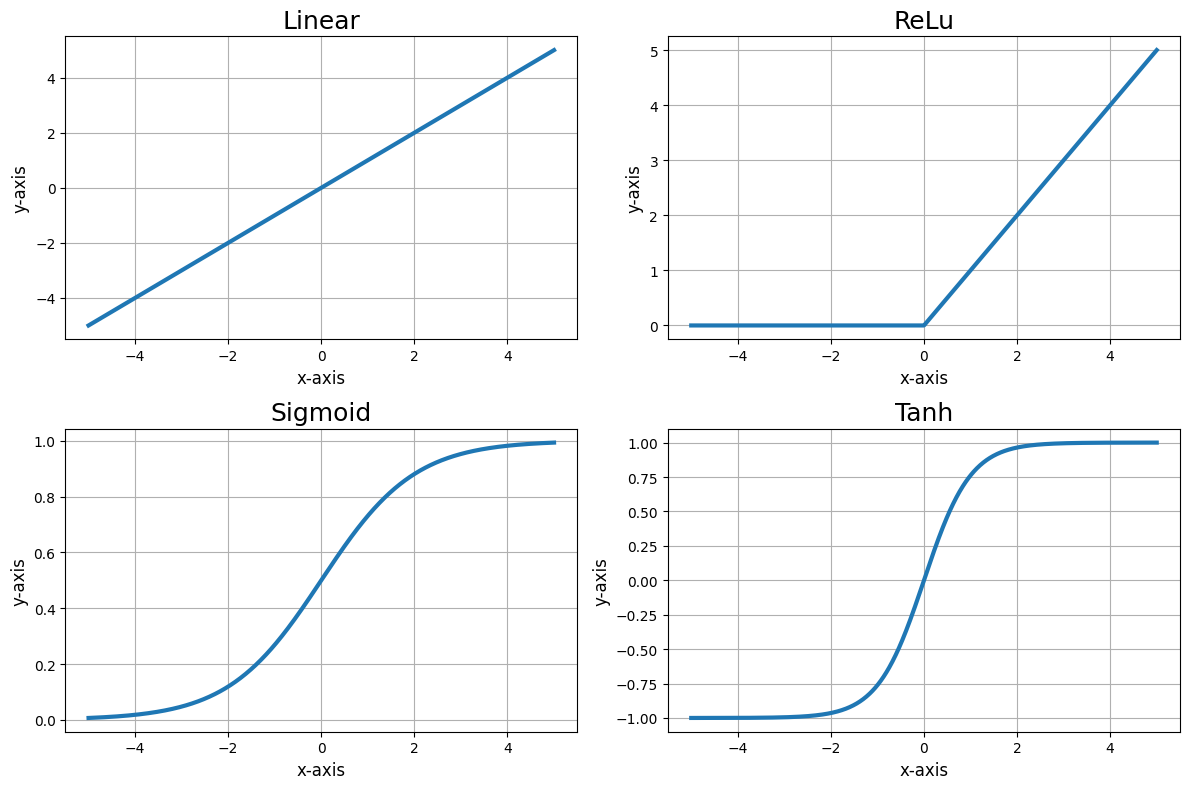

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def linear(x):
  return x

def relu(x):
  return np.maximum(0,x)

def sigmoid(x):
  return 1/ (1+np.exp(-x))

def tanh(x):
  return np.tanh(x)

x=np.linspace(-5,5,1000)

fig,axes = plt.subplots(2,2,figsize=(12,8))

axes[0,0].plot(x,linear(x),linewidth=3)
axes[0,0].set_title('Linear',fontsize=18)
axes[0,0].grid()

axes[0,1].plot(x,relu(x),linewidth=3)
axes[0,1].set_title('ReLu',fontsize=18)
axes[0,1].grid()

axes[1,0].plot(x,sigmoid(x),linewidth=3)
axes[1,0].set_title('Sigmoid',fontsize=18)
axes[1,0].grid()

axes[1,1].plot(x,tanh(x),linewidth=3)
axes[1,1].set_title('Tanh',fontsize=18)
axes[1,1].grid()

for ax in axes.flat:
  ax.set(xlabel='x-axis',ylabel='y-axis')
  ax.xaxis.label.set_size(12)
  ax.yaxis.label.set_size(12)

fig.tight_layout()
plt.show()


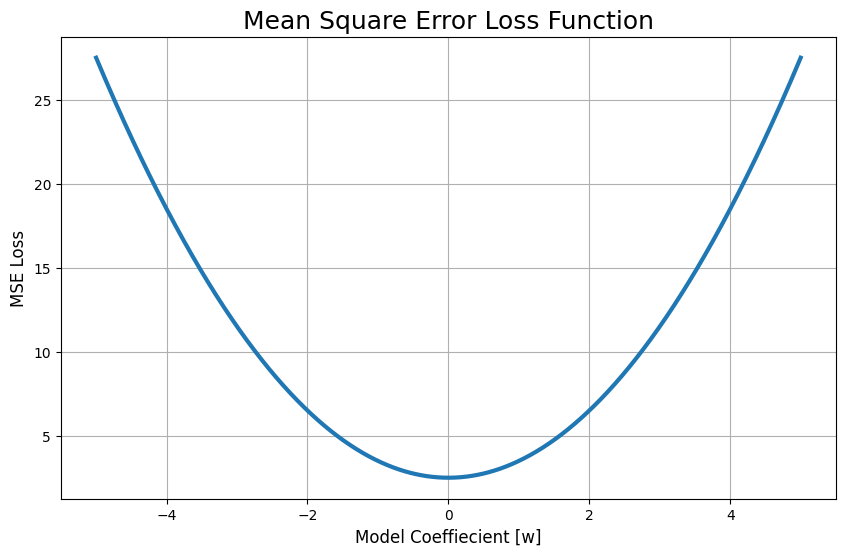

In [ ]:
#MSE Loss Function
import numpy as np
import matplotlib.pyplot as plt

def mse_loss(y_true,y_pred):
  return np.mean((y_true-y_pred)**2)+2.5

y_true=0
x=np.linspace(-5,5,1000)
mse=[mse_loss(y_true,y_pred) for y_pred in x]

plt.figure(figsize=(10,6))
plt.plot(x,mse,linewidth=3)
plt.title('Mean Square Error Loss Function',fontsize=18)
plt.xlabel('Model Coeffiecient [w]',fontsize=12)
plt.ylabel('MSE Loss',fontsize=12)
plt.grid()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical,plot_model


In [2]:
#load the dataset
wine=load_wine()
data=pd.DataFrame(wine.data,columns=wine.feature_names)
data['class']=wine.target

In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

In [3]:
#training and testing sets
X_train,X_test,y_train,y_test = train_test_split(data.drop('class',axis=1),data['class'],test_size=0.2,random_state=42)
X_train.shape ,X_test.shape

((142, 13), (36, 13))

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y_train[:10]

158    2
137    2
98     1
159    2
38     0
108    1
85     1
68     1
143    2
2      0
Name: class, dtype: int64

In [5]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_train_one_hot[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [6]:
#build the ANN model
model = Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(3,activation='softmax')
])

In [7]:
model.summary()
#13 features*64 + bias(64) -- dense 1
#64*32+ bias(32) -- dense 2
#32*3 + bias(3) --dense 3

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3075 (12.01 KB)
Trainable params: 3075 (12.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


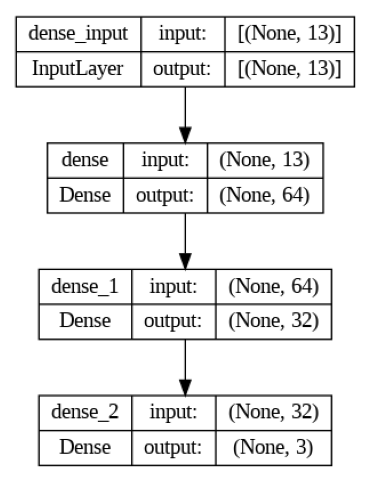

In [8]:
#Plot the ANN model
plot_model(model, to_file='model.png',show_shapes=True,show_layer_names=True)
plt.figure(figsize=(8,6))
img=plt.imread('model.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [9]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#train the model and save its history
h=model.fit(X_train,y_train_one_hot,epochs=100,batch_size=32,validation_split=0.1)

Epoch 1/100
4/4 [==============================] - 1s 89ms/step - loss: 1.2452 - accuracy: 0.3780 - val_loss: 1.3079 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 14ms/step - loss: 1.0743 - accuracy: 0.4882 - val_loss: 1.1403 - val_accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.9312 - accuracy: 0.5669 - val_loss: 0.9990 - val_accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 14ms/step - loss: 0.8091 - accuracy: 0.6299 - val_loss: 0.8788 - val_accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7066 - accuracy: 0.6929 - val_loss: 0.7682 - val_accuracy: 0.6667
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6165 - accuracy: 0.8504 - val_loss: 0.6678 - val_accuracy: 0.8667
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.5385 - accuracy: 0.9134 - val_loss: 0.5707 - val_accuracy: 0.8667
Epoch 8/100
4/4 [===

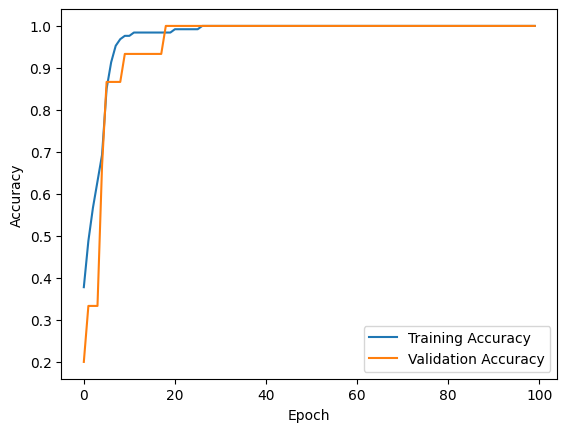

In [10]:
plt.plot(h.history['accuracy'],label='Training Accuracy')
plt.plot(h.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()